###### Reading Dataset

In [2]:
import numpy as np
import pandas as pd

data  = pd.read_csv('train.csv',nrows = 20000000)

In [3]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data_test = pd.read_csv('test.csv')

In [5]:
data.shape

(20000000, 8)

In [6]:
data.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    139
dropoff_latitude     139
passenger_count        0
dtype: int64

In [7]:

data_test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ GB


In [9]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+07,2.000000e+07,2.000000e+07,1.999986e+07,1.999986e+07,2.000000e+07
mean,1.134298e+01,-7.251140e+01,3.992070e+01,-7.251060e+01,3.991950e+01,1.685312e+00
std,1.689916e+01,1.298955e+01,9.388927e+00,1.290617e+01,9.570037e+00,1.321177e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.493652e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


###### Dropping rows with null values

In [10]:
data_cleaned = data.dropna()
data_test = data_test.dropna()

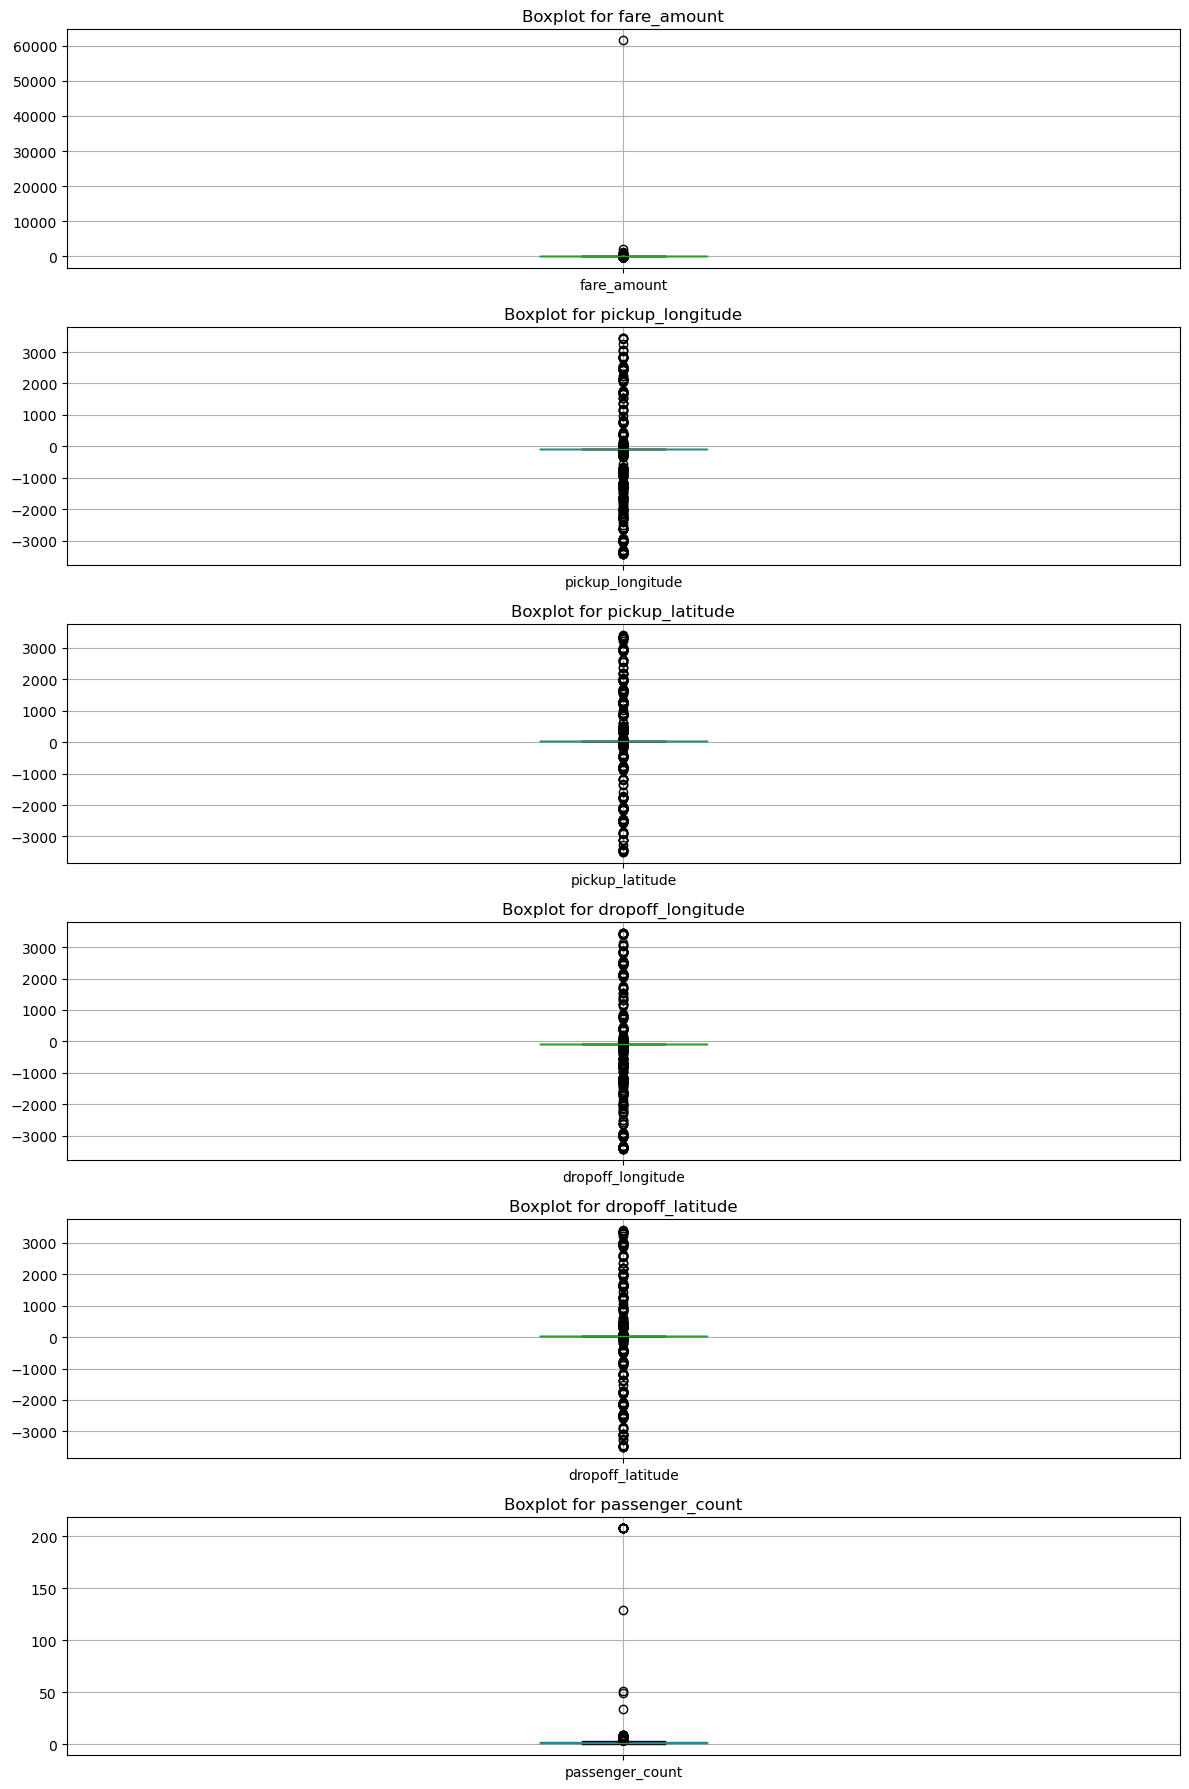

In [11]:
import matplotlib.pyplot as plt

columns_to_plot = [col for col in data_cleaned.columns if col != 'key' and col != 'pickup_datetime']

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, num_columns*3))


if num_columns == 1:
    data_cleaned.boxplot(column=columns_to_plot[0], ax=axes)
    axes.set_title(f'Boxplot for {df_cleaned.columns[0]}')
else:
    for i, column in enumerate(columns_to_plot):
        data_cleaned.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


In [12]:
print(data_cleaned.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


##### Generating maps of pickups and dropoffs

In [13]:
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import display, HTML
import pandas as pd


df = pd.DataFrame(data_cleaned)

df_sample = df.sample(frac=0.01)  # Adjust fraction as needed

# Initialize the map at a specific location
mymap = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Create marker clusters
pickup_cluster = MarkerCluster(name='Pickups').add_to(mymap)
dropoff_cluster = MarkerCluster(name='Dropoffs').add_to(mymap)

# Add markers to the clusters
for index, row in df_sample.iterrows():
    folium.Marker(
        [row['pickup_latitude'], row['pickup_longitude']],
        icon=folium.Icon(color='blue')
    ).add_to(pickup_cluster)

for index, row in df_sample.iterrows():
    folium.Marker(
        [row['dropoff_latitude'], row['dropoff_longitude']],
        icon=folium.Icon(color='red')
    ).add_to(dropoff_cluster)


for index, row in df_sample.iterrows():
    folium.PolyLine(
        locations=[(row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])],
        line_opacity=0.2
    ).add_to(mymap)

folium.LayerControl().add_to(mymap)


mymap.save('mymap2.html')

##### Cleaning data of unwanted values, such as passenger_count in a taxi cannot be greater than 6, thus removing them, longitudes and latititudes should be confined to new york city only, thus removing coordinates not alogning woth the boundaries of new york city.

In [14]:
print(data_cleaned['passenger_count'].unique())

print(data_test['passenger_count'].unique())

[  1   2   3   6   5   4   0 208   9 129   7  51  49   8  34]
[1 2 3 4 5 6]


In [15]:
data_cleaned = data_cleaned[(data_cleaned['passenger_count'] != 0) & (data_cleaned['passenger_count'] != 208)]

In [16]:
data_cleaned.shape

(19929391, 8)

In [17]:
data_cleaned.drop(data_cleaned.index[(data_cleaned.pickup_longitude < -75) | 
           (data_cleaned.pickup_longitude > -72) | 
           (data_cleaned.pickup_latitude < 40) | 
           (data_cleaned.pickup_latitude > 42)],inplace=True)
data_cleaned.drop(data_cleaned.index[(data_cleaned.dropoff_longitude < -75) | 
           (data_cleaned.dropoff_longitude > -72) | 
           (data_cleaned.dropoff_latitude < 40) | 
           (data_cleaned.dropoff_latitude > 42)],inplace=True)

data_cleaned.drop(data_cleaned[data_cleaned['pickup_longitude'] == 0].index, axis=0, inplace = True)
data_cleaned.drop(data_cleaned[data_cleaned['pickup_latitude'] == 0].index, axis=0, inplace = True)
data_cleaned.drop(data_cleaned[data_cleaned['dropoff_longitude'] == 0].index, axis=0, inplace = True)
data_cleaned.drop(data_cleaned[data_cleaned['dropoff_latitude'] == 0].index, axis=0, inplace = True)

In [18]:
data_cleaned.shape

(19509940, 8)

##### Calculating manhattan and haversine distance, but only manhattan distance is added since two distances provide the same information , thus it does not help the model.

In [19]:
from math import radians, sin, cos, sqrt, atan2

df = pd.DataFrame(data_cleaned)

# Function to calculate distance between two points using Haversine formula in miles
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of the Earth in miles

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the change in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate the distance using Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def manhattan_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to miles (approximation)
    lat_miles = 69.0  # Approximate conversion factor: 1 degree latitude ~ 69 miles
    lon_miles = 54.6  # Approximate conversion factor: 1 degree longitude ~ 54.6 miles at 40° latitude

    # Calculate the differences
    dlat_miles = abs(lat2 - lat1) * lat_miles
    dlon_miles = abs(lon2 - lon1) * lon_miles

    # Calculate Manhattan distance
    distance = dlat_miles + dlon_miles

    return distance


# Calculate distances and create a boolean mask for anomalies

df['distance_manhattan'] = df.apply(lambda row: manhattan_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                                      row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


df_cleaned = df

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())
# Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  distance_manhattan  
0                1            0.771304  
1         

In [20]:

data_test['distance_manhattan'] = data_test.apply(lambda row: manhattan_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                                       row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

data_test_cleaned = data_test

In [21]:
df_cleaned.shape

(19509940, 9)

##### Pickup datetime should be broken down into year, date , month, day, hour , minute, second, for the model to learn the properties accurately.

In [22]:
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

In [23]:
df_cleaned['year'] = df_cleaned['pickup_datetime'].dt.year
df_cleaned['month'] = df_cleaned['pickup_datetime'].dt.month
df_cleaned['day'] = df_cleaned['pickup_datetime'].dt.day
df_cleaned['hour'] = df_cleaned['pickup_datetime'].dt.hour
df_cleaned['minute'] = df_cleaned['pickup_datetime'].dt.minute
df_cleaned['second'] = df_cleaned['pickup_datetime'].dt.second
df_cleaned['day_of_week'] = df_cleaned['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df_cleaned['week'] = df_cleaned['pickup_datetime'].dt.isocalendar().week

df_cleaned = df_cleaned.drop(columns=['pickup_datetime'])



In [24]:
##test data
data_test_cleaned['pickup_datetime'] = pd.to_datetime(data_test_cleaned['pickup_datetime'])
data_test_cleaned['year'] = data_test_cleaned['pickup_datetime'].dt.year
data_test_cleaned['month'] = data_test_cleaned['pickup_datetime'].dt.month
data_test_cleaned['day'] = data_test_cleaned['pickup_datetime'].dt.day
data_test_cleaned['hour'] = data_test_cleaned['pickup_datetime'].dt.hour
data_test_cleaned['minute'] = data_test_cleaned['pickup_datetime'].dt.minute
data_test_cleaned['second'] = data_test_cleaned['pickup_datetime'].dt.second
data_test_cleaned['day_of_week'] = data_test_cleaned['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
data_test_cleaned['week'] = data_test_cleaned['pickup_datetime'].dt.isocalendar().week

data_test_cleaned = data_test_cleaned.drop(columns=['pickup_datetime'])


In [25]:
df_cleaned.shape

(19509940, 16)

In [26]:
data_test_cleaned

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_manhattan,year,month,day,hour,minute,second,day_of_week,week
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,1.820734,2015,1,27,13,8,24,1,5
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2.023904,2015,1,27,13,8,24,1,5
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,0.510051,2011,10,8,11,53,44,5,40
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,1.622993,2012,12,1,21,12,12,5,48
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,4.358549,2012,12,1,21,12,12,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,-73.968124,40.796997,-73.955643,40.780388,6,1.827534,2015,5,10,12,37,51,6,19
9910,2015-01-12 17:05:51.0000001,-73.945511,40.803600,-73.960213,40.776371,6,2.681543,2015,1,12,17,5,51,0,3
9911,2015-04-19 20:44:15.0000001,-73.991600,40.726608,-73.789742,40.647011,6,16.513701,2015,4,19,20,44,15,6,16
9912,2015-01-31 01:05:19.0000005,-73.985573,40.735432,-73.939178,40.801731,6,7.107793,2015,1,31,1,5,19,5,5


##### Essential Visualizations

<Figure size 1000x600 with 0 Axes>

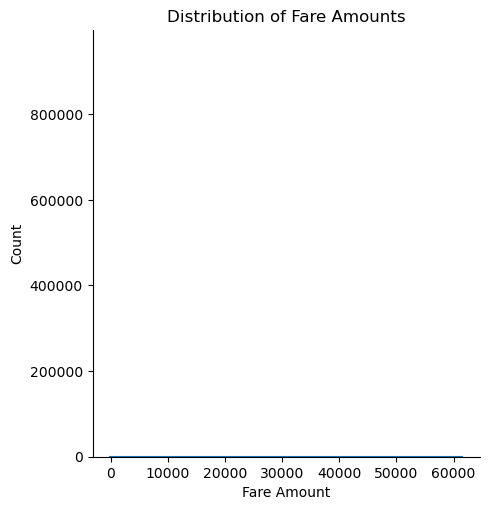

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of fare amounts
plt.figure(figsize=(10, 6))
sns.displot(df_cleaned['fare_amount'], kde=True)

# Adding titles and labels
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Count')

# Show plot
plt.show()

In [28]:


df_cleaned.drop(df_cleaned.index[(df_cleaned.fare_amount > 100) | (df_cleaned.fare_amount < 0)], inplace = True)

print("Cleaned DataFrame shape:", df_cleaned.shape)


Cleaned DataFrame shape: (19502542, 16)


In [29]:
df_cleaned

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_manhattan,year,month,day,hour,minute,second,day_of_week,week
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.771304,2009,6,15,17,26,21,0,25
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,6.886557,2010,1,5,16,52,16,1,1
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.203170,2011,8,18,0,35,0,3,33
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.963741,2012,4,21,4,30,42,5,16
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.711650,2010,3,9,7,51,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999995,2013-10-16 17:49:00.000000156,9.5,-73.977708,40.776922,-73.966862,40.772447,5,0.900967,2013,10,16,17,49,0,2,42
19999996,2014-08-08 00:16:56.0000003,3.5,-73.963245,40.766756,-73.965499,40.763579,1,0.342281,2014,8,8,0,16,56,4,32
19999997,2009-10-10 22:14:00.00000057,4.9,-73.970945,40.794278,-73.961380,40.801378,1,1.012149,2009,10,10,22,14,0,5,41
19999998,2014-12-10 12:26:00.000000159,5.5,-73.968077,40.799802,-73.961062,40.811672,6,1.202049,2014,12,10,12,26,0,2,50


/var/folders/9h/rw53bw294jndnnjlw1p_m7pr0000gn/T/ipykernel_460/3442566406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


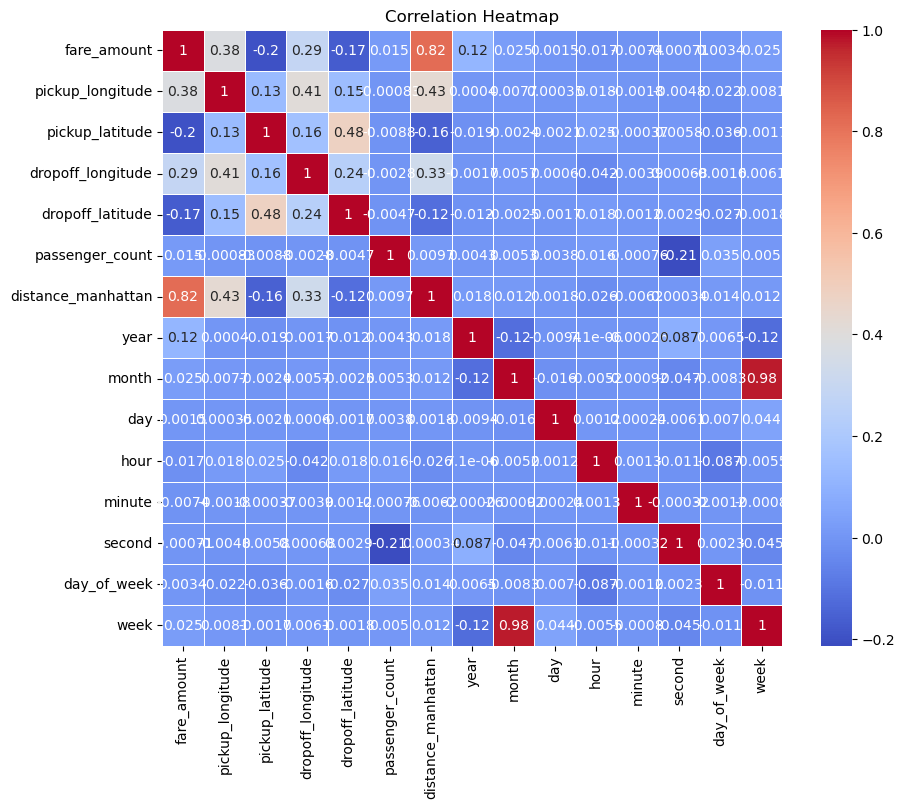

In [30]:
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df_cleaned = df_cleaned.drop(['week'], axis = 1)

In [32]:
data_test_cleaned = data_test_cleaned.drop(['week'], axis = 1)

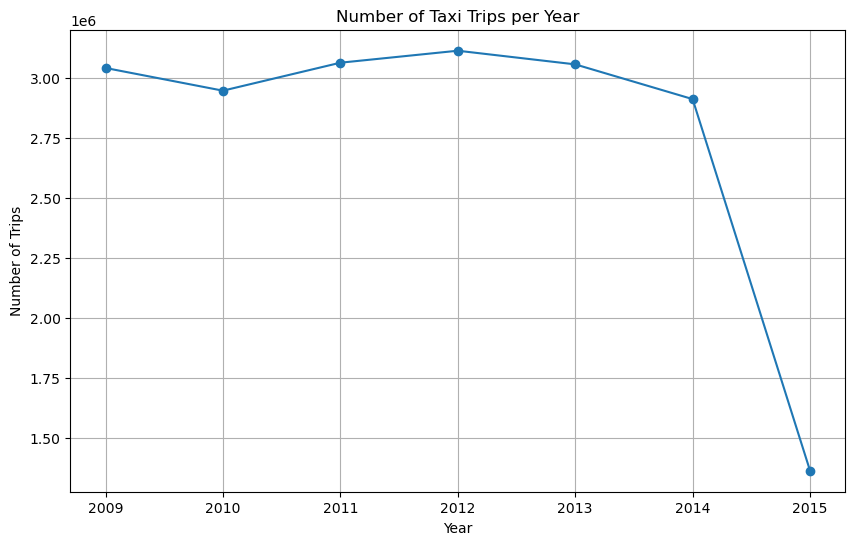

In [33]:
yearly_trip_counts = df_cleaned.groupby('year').size().reset_index(name='trip_count')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(yearly_trip_counts['year'], yearly_trip_counts['trip_count'], marker='o', linestyle='-')
plt.title('Number of Taxi Trips per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

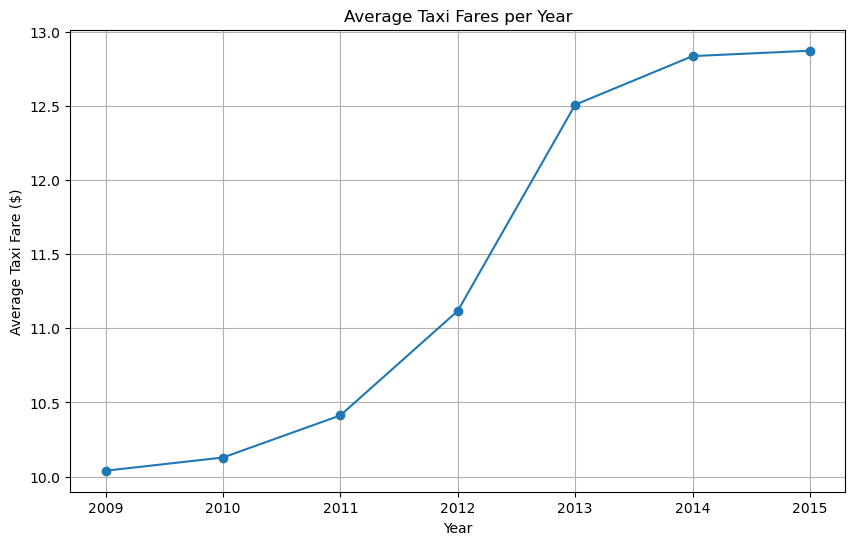

In [34]:
yearly_avg_fare = df_cleaned.groupby('year')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_fare['year'], yearly_avg_fare['fare_amount'], marker='o', linestyle='-')
plt.title('Average Taxi Fares per Year')
plt.xlabel('Year')
plt.ylabel('Average Taxi Fare ($)')
plt.grid(True)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_cleaned.drop(columns = ['fare_amount','key'])
Y = df_cleaned['fare_amount']

In [36]:


xtest = data_test_cleaned.drop('key', axis = 1)

In [37]:
xtest

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_manhattan,year,month,day,hour,minute,second,day_of_week
0,-73.973320,40.763805,-73.981430,40.743835,1,1.820734,2015,1,27,13,8,24,1
1,-73.986862,40.719383,-73.998886,40.739201,1,2.023904,2015,1,27,13,8,24,1
2,-73.982524,40.751260,-73.979654,40.746139,1,0.510051,2011,10,8,11,53,44,5
3,-73.981160,40.767807,-73.990448,40.751635,1,1.622993,2012,12,1,21,12,12,5
4,-73.966046,40.789775,-73.988565,40.744427,1,4.358549,2012,12,1,21,12,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,1.827534,2015,5,10,12,37,51,6
9910,-73.945511,40.803600,-73.960213,40.776371,6,2.681543,2015,1,12,17,5,51,0
9911,-73.991600,40.726608,-73.789742,40.647011,6,16.513701,2015,4,19,20,44,15,6
9912,-73.985573,40.735432,-73.939178,40.801731,6,7.107793,2015,1,31,1,5,19,5


In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
xtest_scaled = scaler.transform(xtest)
x_test_scaled = scaler.transform(x_test)


In [39]:
x_train_scaled

array([[ 0.88351905,  0.24232446,  3.82990889, ...,  0.13333333,
        -0.09375   ,  0.        ],
       [-1.06594049, -0.66492333, -0.03842488, ...,  0.16666667,
        -0.09375   ,  0.75      ],
       [ 1.81561704,  2.99012107,  4.73144513, ...,  0.46666667,
        -0.09375   , -0.25      ],
       ...,
       [-1.0567589 , -0.71974173, -0.55312012, ..., -0.56666667,
        -0.09375   ,  0.        ],
       [-0.24393807, -0.80558515, -0.01257958, ..., -0.36666667,
         1.        ,  0.5       ],
       [-0.08046409,  0.43083132, -0.04090268, ..., -0.73333333,
         1.46875   ,  0.75      ]])

In [40]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# model = RandomForestRegressor(max_depth = 20, n_estimators = 600)
# model.fit(x_train_scaled, y_train)

# y_pred = model.predict(x_test_scaled)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'RMSE: {rmse}')

# r2 = r2_score(y_test, y_pred)
# print(f'Validation R-squared: {r2}')



In [41]:
# from sklearn.ensemble import AdaBoostRegressor

# modelada = AdaBoostRegressor(learning_rate = 0.01, n_estimators = 200)

# modelada.fit(x_train_scaled, y_train)

# y_pred = modelada.predict(x_test_scaled)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'RMSE: {rmse}')

In [53]:
import xgboost as xg
from sklearn.metrics import mean_squared_error, r2_score

train_dmatrix = xg.DMatrix(data = x_train, label = y_train) 
valid_dmatrix = xg.DMatrix(data = x_test, label = y_test)
test_dmatrix = xg.DMatrix(data = xtest)


xgb_params = { 
    'learning_rate': 0.3, 
    'max_depth': 7,
    'subsample': 0.9,
    'eval_metric': 'rmse'}

xgb_r = xg.train(xgb_params,dtrain = train_dmatrix,num_boost_round=100)
y_pred = xgb_r.predict(valid_dmatrix)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE of validation: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'Validation R-squared: {r2}')


RMSE of validation: 3.3135307693081772
Validation R-squared: 0.8749871735172259


In [43]:
# cv_results = xg.cv(
#     dtrain=train_dmatrix,
#     params=xgb_params,
#     nfold=5,
#     num_boost_round=1000,
#     early_stopping_rounds=50,
#     metrics="rmse",
#     as_pandas=True,
#     seed=42
# )

# print(cv_results)
# print("Best number of boosting rounds:", cv_results.shape[0])

In [44]:
# import xgboost as xg 

# xgb_model = xg.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 1000],
#     'learning_rate': [0.01, 0.1, 0.2, 0.05],
#     'max_depth': [5, 7, 10],
#     'subsample': [0.7, 0.8, 0.9]
# }

# # Define RMSE scorer
# rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# # Initialize GridSearchCV with RMSE as the scoring metric
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring=rmse_scorer, n_jobs=-1)

# # Fit GridSearchCV
# grid_search.fit(x_train_scaled, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f'Best Parameters: {best_params}')

In [45]:
# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score

# lgb_regressor = lgb.LGBMRegressor(
#     learning_rate=0.1,
#     max_depth=-1,
#     n_estimators=100,
#     random_state=42
# )

# # Perform cross-validation
# cv_scores = cross_val_score(lgb_regressor, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert to RMSE
# rmse_scores = np.sqrt(-cv_scores)

# # Print the results
# print("RMSE scores for each fold: ", rmse_scores)
# print("Mean RMSE: ", rmse_scores.mean())
# print("Standard Deviation of RMSE: ", rmse_scores.std())

In [54]:
y_pred1 = xgb_r.predict(test_dmatrix)

In [55]:
submission = pd.DataFrame({
    'key': data_test_cleaned['key'],
    'fare_amount': y_pred1
})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)


#### I have used Random Forest Regressor, XgBoost and AdaBoost Regressor, among which XGBoost performs the best, interms of the metric (root mean squared error) and the time taken to build and execucte the model